In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pd.set_option('display.max_colwidth', None)

In [3]:
df_news = pd.read_csv('df5.csv')
df_news.head()

index        date  \
0      0  2020-12-15   
1      1  2020-03-05   
2      2  2020-08-04   
3      3  2021-06-14   
4      4  2021-07-13   

                                                                                  title  \
0                                  There's a Big Tree Growing Through a Car in Illinois   
1  Former Fox White House reporter Wendell Goler dies | AM 560 The ANSWER - Chicago, IL   
2           Nazareth Home in East Chicago closing after 27 years of service to children   
3       Justice official resigning amid uproar over Dems’ subpoenas - Chicago Sun-Times   
4                                                 Chicago Weather: Patchy Fog Overnight   

   topics  \
0      25   
1      28   
2       6   
3      28   
4       4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [4]:
df_news.columns

Index(['index', 'date', 'title', 'topics', 'combined', 'topics1', 'topics2'], dtype='object')

In [5]:
df_news.drop(columns = ['index', 'title', 'topics', 'topics1'], axis = 1, inplace= True)

In [6]:
def get_400_char(txt):
    return txt[:400]

In [7]:
df_news['text_sent'] = df_news.apply(lambda x: get_400_char(x['combined']), axis = 1)
df_news.head()

date  \
0  2020-12-15   
1  2020-03-05   
2  2020-08-04   
3  2021-06-14   
4  2021-07-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Bi Directional GRU

In [8]:
import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

In [9]:
#Verify we got CPU + GPU or only CPU
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# import ktrain
import ktrain
from ktrain import text
ktrain.__version__

'0.28.3'

##### Check available text classifiers in ktrain

In [11]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [12]:
yelp = pd.read_csv('Yelp_data.csv', index_col = 'Unnamed: 0')
# yelp = pd.read_json(yelp_path, orient='records', lines=True).head(10000)
yelp.shape

(10286, 2)

In [13]:
yelp.head(5)

,text,y
0,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place.\n\nBottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!",1
1,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",5
2,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless manager, who seeing us with barely nibbled entrees\non plates shoved forward for pickup, thanked us\nperfunctorily for our patronage;\n\nWe're from the Texas Hill Country;\ndown there, we jail critters \nwho serve up grub this bad,\nfor their own protection.\n\nNever, never, NEVER again\n(Back to Yard House for real food)",1
3,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I see and taste here tells me that they're using top-grade fresh ingredients. The brisket sandwich is probably my favorite... and it's the one my wife ALWAYS gets. Unlike her, I often bounce around the menu to try different things. Definitely a step up from Subway, Quiznos, Jimmy Johns, etc in my opinion. As with all of my reviews, I grade each place relative to what I perceive to be its peers - so five star compared to them.",5
4,"Really good place with simple decor, amazing food and great hospitality.\nVery impressed with the lunch portion. Although service took little extra time but I have no complaints since they are quite new in business. The green curry chicken was good and to the right spice balance I asked for. I will definitely recommend this place to others.",5


#### Prepare source data

In [14]:
sentiment = {1: "Negative", 5: "Positive"}
yelp['sentiment'] = yelp['y'].map(sentiment)

In [15]:
df = yelp[['text', 'sentiment']].rename(columns={'text':'data', 'sentiment':'target'})

In [16]:
df.head(2)

,data,target
0,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place.\n\nBottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!",Negative
1,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",Positive


In [17]:
df.groupby(['target']).count()

,data
target,
Negative,5001
Positive,5285


## STEP 1:  Load and Preprocess the Dataset

Preprocess the data using the texts_from_array function (since the data resides in an array). If your documents are stored in folders or a CSV file you can use the texts_from_folder or texts_from_csv functions, respectively.

In [18]:
maxFeatures = 20000 #num of words to consider in vocabulary
maxLen = 200 #each document can be of most <maxLen> words. 0 is used as padding ID.
nGramRange = 1 #size of multi-word phrases to consider
preprocessMode='standard' #Either 'standard' (normal tokenization) or 'bert' tokenization and preprocessing for use with BERT text classification model.
sampleSize = 0.3 #Proportion of training to use for validation

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_df(train_df = df, 
                                                                    text_column  = 'data', 
                                                                    label_columns = ['target'],
                                                                       val_pct=sampleSize,
                                                                       preprocess_mode=preprocessMode, #text must be preprocessed in a specific way for use with BERT
                                                                       maxlen=maxLen, 
                                                                       max_features=maxFeatures)

['Negative', 'Positive']
       Negative  Positive
10029       0.0       1.0
10007       0.0       1.0
9382        1.0       0.0
1354        1.0       0.0
4651        0.0       1.0
['Negative', 'Positive']
      Negative  Positive
382        1.0       0.0
2352       1.0       0.0
7929       1.0       0.0
6962       1.0       0.0
3650       1.0       0.0
language: en
Word Counts: 23218
Nrows: 7200
7200 train sequences
train sequence lengths:
	mean : 108
	95percentile : 314
	99percentile : 514
x_train shape: (7200,200)
y_train shape: (7200, 2)
Is Multi-Label? False
3086 test sequences
test sequence lengths:
	mean : 105
	95percentile : 289
	99percentile : 520
x_test shape: (3086,200)
y_test shape: (3086, 2)


## STEP 2:  Load a pretrained fastText model and wrap it in a `ktrain.Learner` object

This step can be condensed into a single line of code, but we execute it as two lines for clarity. (You can ignore the deprecation warnings arising from Keras 2.2.4 with TensorFlow 1.14.0.)  

In [19]:
model = text.text_classifier('bigru', (x_train, y_train), preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 200
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


In [20]:
batchSize = 64 ### Check best size

learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test), 
                             batch_size=batchSize)

## STEP 3: Train the Model
We train using one of the three learning rates recommended in the BERT paper: *5e-5*, *3e-5*, or *2e-5*.
Alternatively, the ktrain Learning Rate Finder can be used to find a good learning rate by invoking `learner.lr_find()` and `learner.lr_plot()`, prior to training.
The `learner.fit_onecycle` method employs a [1cycle learning rate policy](https://arxiv.org/pdf/1803.09820.pdf).

In [21]:
# briefly simulate training to find good learning rate

learner.lr_find(max_epochs=10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
113/113 [==============================] - 15s 82ms/step - loss: 0.7054 - accuracy: 0.4837
Epoch 2/10
113/113 [==============================] - 9s 81ms/step - loss: 0.7037 - accuracy: 0.4844
Epoch 3/10
113/113 [==============================] - 9s 81ms/step - loss: 0.6967 - accuracy: 0.4938
Epoch 4/10
113/113 [==============================] - 9s 82ms/step - loss: 0.6718 - accuracy: 0.6122
Epoch 5/10
113/113 [==============================] - 9s 82ms/step - loss: 0.4902 - accuracy: 0.7606
Epoch 6/10
113/113 [==============================] - 10s 85ms/step - loss: 0.1407 - accuracy: 0.9503
Epoch 7/10
113/113 [==============================] - 9s 84ms/step - loss: 0.1707 - accuracy: 0.9429
Epoch 8/10
113/113 [==============================] - 2s 20ms/step - loss: 0.9368 - accuracy: 0.8270


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the m

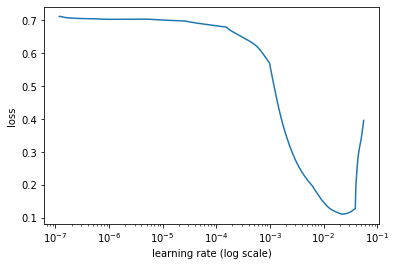

In [22]:
learner.lr_plot()

In [24]:
learningRate = 0.05
numEpoch = 5

# learner.fit_onecycle(learningRate, numEpoch)
learner.autofit(learningRate, numEpoch)



begin training using triangular learning rate policy with max lr of 0.05...
Epoch 1/5
113/113 [==============================] - 13s 94ms/step - loss: 0.3226 - accuracy: 0.8637 - val_loss: 0.1506 - val_accuracy: 0.9404
Epoch 2/5
113/113 [==============================] - 10s 88ms/step - loss: 0.1146 - accuracy: 0.9613 - val_loss: 0.2074 - val_accuracy: 0.9375
Epoch 3/5
113/113 [==============================] - 10s 89ms/step - loss: 0.0993 - accuracy: 0.9663 - val_loss: 0.2068 - val_accuracy: 0.9378
Epoch 4/5
113/113 [==============================] - 10s 90ms/step - loss: 0.0863 - accuracy: 0.9715 - val_loss: 0.2086 - val_accuracy: 0.9297
Epoch 5/5
113/113 [==============================] - 10s 92ms/step - loss: 0.0890 - accuracy: 0.9711 - val_loss: 0.2570 - val_accuracy: 0.9255


In [26]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1521
           1       0.94      0.91      0.93      1565

    accuracy                           0.93      3086
   macro avg       0.93      0.93      0.93      3086
weighted avg       0.93      0.93      0.93      3086



array([[1426,   95],
       [ 135, 1430]], dtype=int64)

## STEP 4: Making predictions
We can call the `learner.get_predictor` method to obtain a Predictor object capable of making predictions on new raw data.

In [27]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [28]:
predictor.get_classes()

['Negative', 'Positive']

In [29]:
print(df.data.iloc[0])

I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetolog

In [30]:
print(predictor.predict(df.data.iloc[0]))

Negative


In [31]:
print(df.target.iloc[0])

Negative


In [32]:
print(df_news.text_sent.iloc[1005])
print(predictor.predict(df_news.text_sent.iloc[1005]))

Cleared Chicago priest holds first Mass since reinstatement Cleared Chicago priest holds first Mass since reinstatement SOPHIA TAREEN , Associated Press Facebook Twitter Email 12 1 of 12 A parishioner raises Rev. Michael Pflegers arm as he conducts his first Sunday church service as a senior pastor at St. Sabina Catholic Church following his reinstatement by Archdiocese of Chicago after decadesold
Negative


In [33]:
print(predictor.predict('hicago mayor defends ban of protesters on her block, says she has right to make her home secure https:www.chicagotribune.compoli...0200820s563zjj4uzc2rcbprrruzalwaqstory.htmlJust another example of the hypocrisy of democratic leaders, promoting protests and gun control, b'))

Negative


In [34]:
predictor.save('bi_gru_predictor1')

In [35]:
def senti(text):
    return predictor.predict(text)

In [36]:
df_news['sentiment'] = df_news.apply(lambda x: senti(x['text_sent']), axis = 1)

In [37]:
senti = {"Negative": -1 , "Positive": 1}
df_news['sentiment_score'] = df_news['sentiment'].map(senti)

In [38]:
df_news.head()

date  \
0  2020-12-15   
1  2020-03-05   
2  2020-08-04   
3  2021-06-14   
4  2021-07-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
df_news.to_csv('Sentiment_score1.csv', index = False)

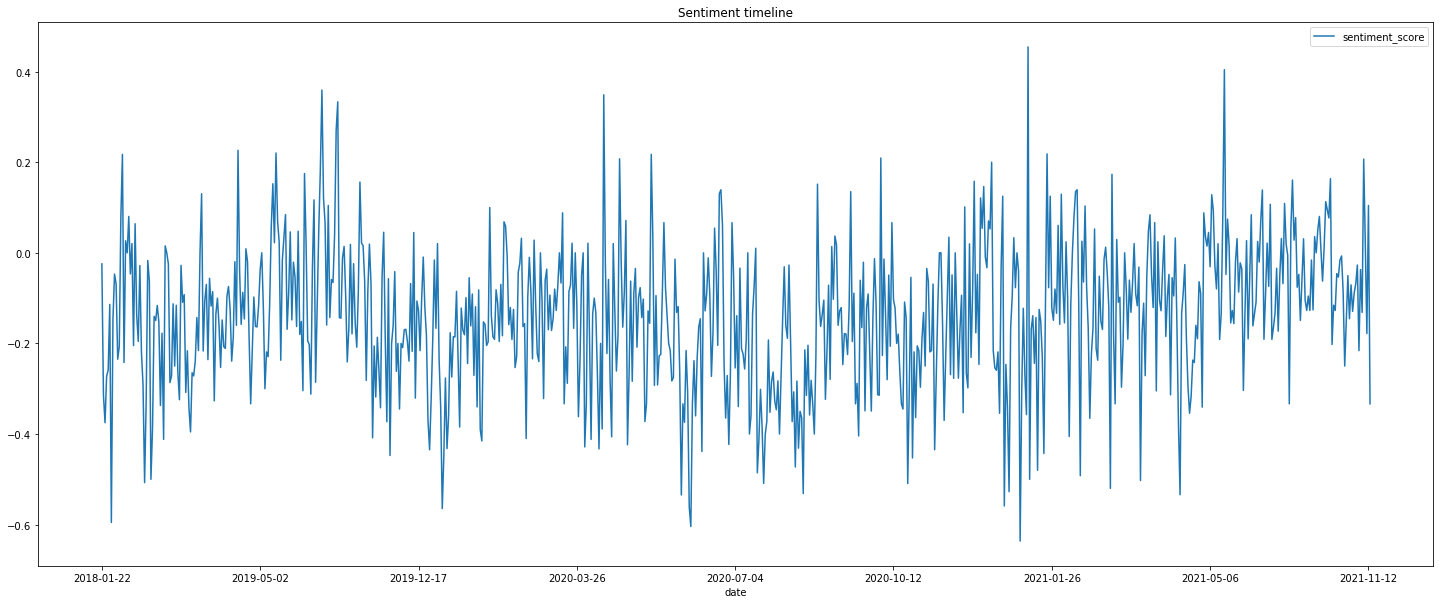

In [40]:
plt.rcParams["figure.figsize"] = (25,10)

tweet_timeline_df = df_news.copy()
tweet_timeline_df = tweet_timeline_df[['date', 'sentiment_score']].set_index('date')

tweet_timeline_df.groupby(by='date').mean().plot()
#tweet_timeline_df.plot()
plot = plt.title(f'Sentiment timeline')